In [7]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -1.
b = 1


def u(x):
    return np.cos(x * 2 * np.pi / (b - a))


def f(x):
    return ((2 * np.pi / (b - a)) ** 2 + 1) * np.cos(x * 2 * np.pi / (b - a))

# def u(x):
#     return np.pi * np.e ** (1 - x) * (np.e ** (2 * x) - 1) / (1 + np.e ** 2) + np.sin(np.pi * x)
# 
# 
# def f(x):
#     return ((2 * np.pi / (b - a)) ** 2 + 1) * np.sin(x * 2 * np.pi / (b - a))

In [8]:
# Parameters
d = 1
k = 1
delta = 1.
ncentres = 50

# Computed Parameters
phi = rad.Wendland(d, k)
xc = rad.grid(np.linspace(a, b, ncentres), d)
integrator = rad.integrate.TrapezoidIntegrator(((a, b),), 5000)
# integrator = rad.integrate.QuadIntegrator(((a, b),))

# Solve for approximate solution
solver = rad.solve.HelmholtzSolver(integrator, phi, delta, *xc)
approx = solver.solve(f)
error = rad.error(u, approx, integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 675.711461450784
Condition Number: 6.238578308567127e+17


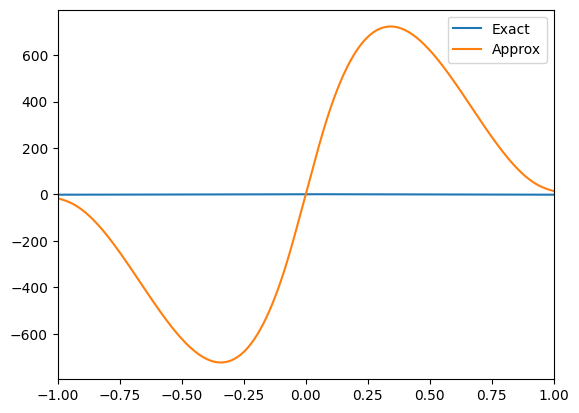

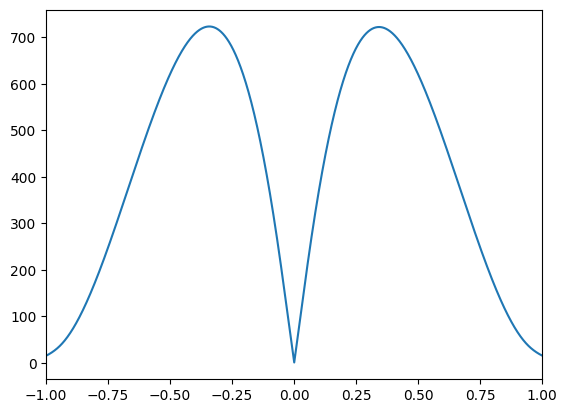

In [9]:
rad.plot.many(a, b, u, approx, labels=["Exact", "Approx"])
rad.plot.difference(a, b, u, approx)

In [17]:
solver.b

array([-2.67891113, -2.77160482, -2.81075322, -2.78891809, -2.70093099,
       -2.54388963, -2.31711704, -2.02208424, -1.66229756, -1.24315259,
       -0.7717571 , -0.25672579,  0.2920496 ,  0.8636513 ,  1.44640322,
        2.02815121,  2.59655116,  3.13936019,  3.64472622,  4.10147109,
        4.49936267,  4.82937135,  5.08390691,  5.25703164,  5.34464642,
        5.34464642,  5.25703164,  5.08390691,  4.82937135,  4.49936267,
        4.10147109,  3.64472622,  3.13936019,  2.59655116,  2.02815121,
        1.44640322,  0.8636513 ,  0.2920496 , -0.25672579, -0.7717571 ,
       -1.24315259, -1.66229756, -2.02208424, -2.31711704, -2.54388963,
       -2.70093099, -2.78891809, -2.81075322, -2.77160482, -2.67891113])